In [1]:
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [19]:
df = web.DataReader('FB', data_source = 'yahoo', start='2016-01-01', end='2020-07-05') 

In [20]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-26,233.089996,215.399994,232.639999,216.080002,76343900,216.080002
2020-06-29,220.750000,207.110001,209.750000,220.639999,58514300,220.639999
2020-06-30,227.500000,218.470001,220.589996,227.070007,33927100,227.070007
2020-07-01,239.000000,227.559998,228.500000,237.550003,43399700,237.550003
2020-07-02,240.000000,232.610001,239.000000,233.419998,30633600,233.419998


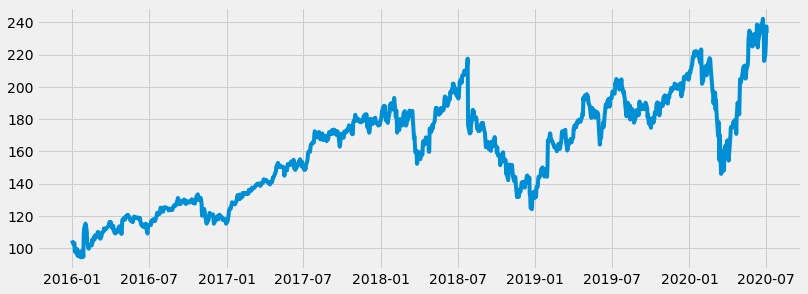

In [21]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df.index, df['Close'], label = 'Close Price')
plt.show()

In [22]:
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = df['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
Date,
2015-12-31,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
...,...
2020-06-26,230.214000
2020-06-29,230.539333
2020-06-30,231.002000


In [23]:
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = df['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
Date,
2015-12-31,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
...,...
2020-06-26,198.8039
2020-06-29,198.9092
2020-06-30,199.0714


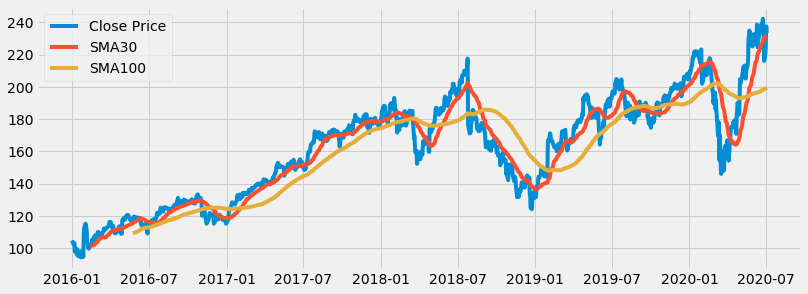

In [24]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df.index, df['Close'], label = 'Close Price')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.legend()
plt.show()

In [25]:
data = pd.DataFrame()
data['Adj Close'] = df['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,Adj Close,SMA30,SMA100
Date,,,
2015-12-31,104.660004,NaN,NaN
2016-01-04,102.220001,NaN,NaN
2016-01-05,102.730003,NaN,NaN
2016-01-06,102.970001,NaN,NaN
2016-01-07,97.919998,NaN,NaN
...,...,...,...
2020-06-26,216.080002,230.214000,198.8039
2020-06-29,220.639999,230.539333,198.9092
2020-06-30,227.070007,231.002000,199.0714


In [26]:
def buy_sell(signal):
    buy = []
    sell = []
    flag = -1
    
    for i in range(len(signal)):
        if signal['SMA30'][i] > signal['SMA100'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Adj Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif signal['SMA30'][i] < signal['SMA100'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal['Adj Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return buy, sell

In [27]:
a = buy_sell(data)
data['Buy_Signal_Price'] = a[0]
data['Sell_Signal_Price'] = a[1]

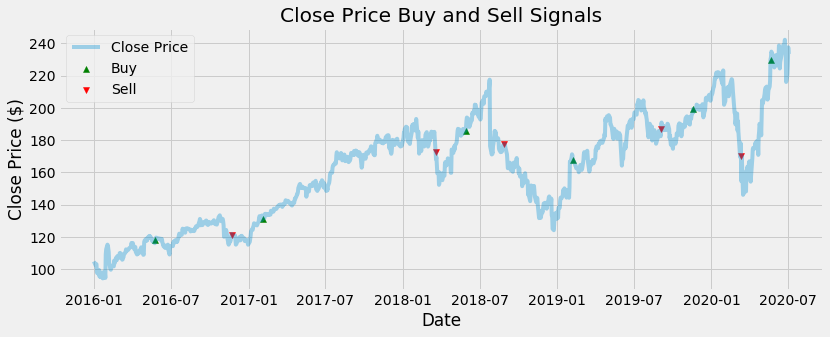

In [28]:
plt.figure(figsize = (12.2, 4.5))
plt.scatter(df.index, data["Buy_Signal_Price"], color = 'green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(df.index, data["Sell_Signal_Price"], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(data['Adj Close'], label = 'Close Price', alpha = 0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()